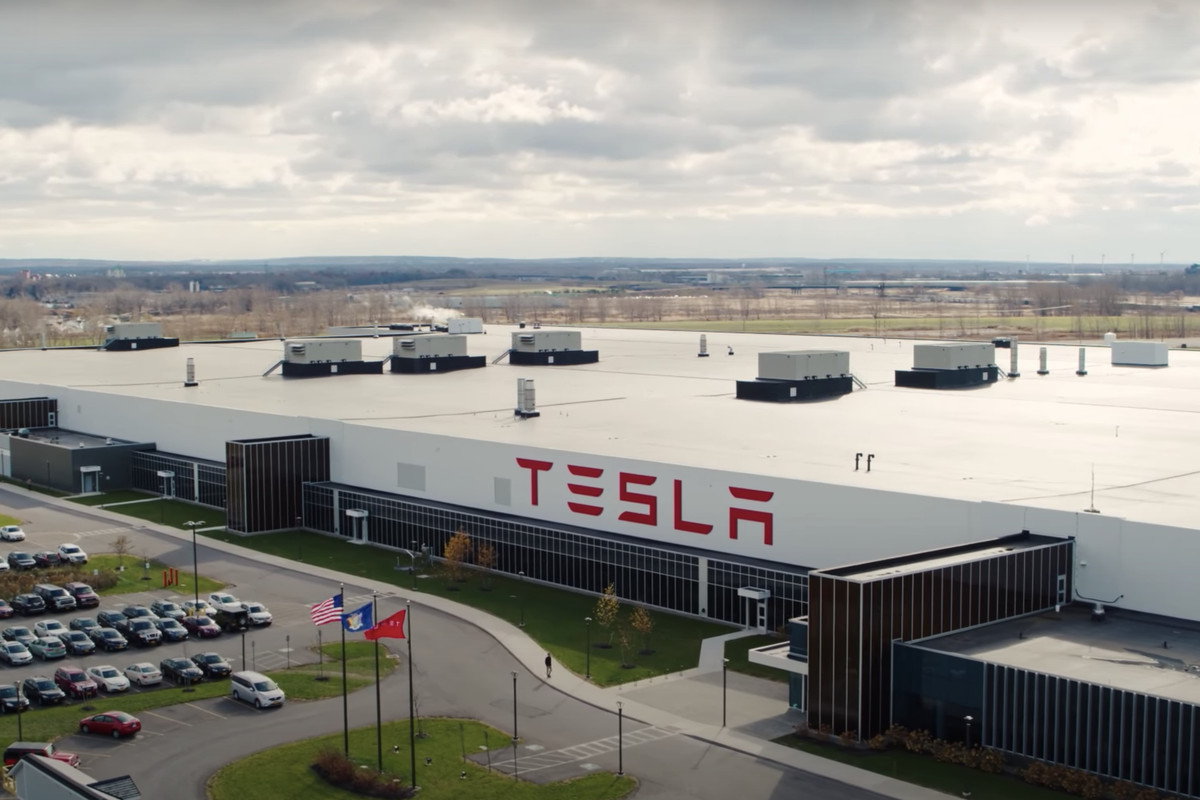

In [1]:
from IPython.display import Image
Image("/kaggle/input/xau-to-inr-image/Tesla GigaFactory Image.jpeg")

**Tesla**, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. 

The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. 

This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extended service plans. 

The Energy Generation and Storage segment engages in the design, manufacture, installation, sale, and leasing of solar energy generation and energy storage products, and related services to residential, commercial, and industrial customers and utilities through its website, stores, and galleries, as well as through a network of channel partners.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📒 Overview of Dataset </div>

# 📒 Overview of Dataset 

## Dataset contains following fields

* **Date** - Each trading day
* **Open** - Open price of stock
* **High** - High price of stock in the particular day
* **Low** - Low price of the stock in the particular day
* **Close** - Close price of the stock at end of the day
* **Adj Close** - Adjusted close price of stock *
* **Volume** - Volume traded in the entire day

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📋 How Adjusted Close price is calculated </div>

# 📒 Close price and Adujusted Close price

When trading is done for the day on a stock exchange, all stocks are priced at close. The price that is quoted at the end of the trading day is the price of the last lot of stock that was traded for the day. This is referred to as the stock's closing price. 

    It's worth noting that closing prices do not reflect after-hours prices or any corporate actions that might alter the stock's price from time to time, although they act as useful markers for investors to assess changes in value over time.
    
    Good or bad news related to a company, its industry, or the economy overall can affect the price of any stock during the day. Less often but equally important, any distribution that is made by the company to shareholders will also affect the stock price.
    
**Calculating Adjusted Closing Price**

The adjusted closing price is often used when examining historical returns or performing a detailed analysis of historical returns.

When distributions are made, the adjusted closing price calculations are simple. For cash dividends, the value of the dividend is deducted from the last closing sale price of the stock.

    The adjusted closing price is used when tracking or analyzing historical returns.

**Example**

Adjusted closing price refers to the price of the stock after paying off the dividends. For instance, if a stock is priced at Rs. 100 and gives a dividend of INR5 per share, then its adjusted closing price would be Rs. 95. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
path = '/kaggle/input/tesla-stock-pricing-20172022/TSLA.csv'

/kaggle/input/tesla-stock-pricing-20172022/TSLA.csv
/kaggle/input/xau-to-inr-image/GoldPrice_EP.jpg
/kaggle/input/xau-to-inr-image/XAU to INR.png
/kaggle/input/xau-to-inr-image/DMart.jpg
/kaggle/input/xau-to-inr-image/Virat.jpg
/kaggle/input/xau-to-inr-image/River-side Mandi.jpg
/kaggle/input/xau-to-inr-image/Bitcoin_history_price.jpg
/kaggle/input/xau-to-inr-image/AR.png
/kaggle/input/xau-to-inr-image/Microsoft-overtakes-Google.jpg
/kaggle/input/xau-to-inr-image/MA.png
/kaggle/input/xau-to-inr-image/Equation-3-min.png
/kaggle/input/xau-to-inr-image/algorithmic-trading.jpg
/kaggle/input/xau-to-inr-image/Equation-4-min.png
/kaggle/input/xau-to-inr-image/Tesla GigaFactory Image.jpeg
/kaggle/input/xau-to-inr-image/Messi.jpeg
/kaggle/input/xau-to-inr-image/Data-Science.png
/kaggle/input/xau-to-inr-image/apple-aapl-stock-split.jpeg


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📈 Time series Analysis - Important Notations 🥇</div>

# 📒 Important Terms to understand for Time Series Analysis 

A Time-Series is a sequence of data points collected at different timestamps. These are essentially successive measurements collected from the same data source at the same time interval. Further, we can use these chronologically gathered readings to monitor trends and changes over time. The time-series models can be univariate or multivariate. The univariate time series models are implemented when the dependent variable is a single time series, like room temperature measurement from a single sensor. On the other hand, a multivariate time series model can be used when there are multiple dependent variables, i.e., the output depends on more than one series. An example for the multivariate time-series model could be modelling the GDP, inflation, and unemployment together as these variables are linked to each other.

### 📗 1. Stationary and Non-Stationary Time Series
**Stationarity is a property of a time series.** A stationary series is one where the values of the series is not a function of time. That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up. **A stationary time series id devoid of seasonal effects as well.**

### 📗 2. Trend
The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

### 📗 3.Seasonality 
The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

### 📗 4. Cyclical Component
These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

### 📗  5. Irregular Variation 
These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

### 📗  6. ETS Decomposition
ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

### 📗  7. Dependence
It refers to the association of two observations of the same variable at prior time periods.

### 📗 8. Differencing
Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

### 📗 9. Specification 
It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models.

### 📗 10. ARIMA 
ARIMA stands for Auto Regressive Integrated Moving Average.

# 📒 1. Load Tesla data

In [3]:
dataset = pd.read_csv(path, low_memory = False)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000


In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.335986,124.135435,118.313505,121.313569,121.313569,1.320049e+08
std,118.689726,121.405477,115.647051,118.567328,118.567328,9.025711e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.811667,21.127333,20.350667,20.781666,20.781666,7.542375e+07
50%,47.387333,49.579334,45.799999,48.302666,48.302666,1.016115e+08
75%,233.383331,238.436661,227.154999,233.135002,233.135002,1.526895e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# 📊 2. EDA on Tesla Data

## 📗 2.1 Check any null values present

In [5]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Obs - 

    We found no null values in the dataset. Good to go for forecasting. 

## 📗 2.2 Plotting Few OHLC data

In [6]:
import plotly.graph_objects as go
from datetime import datetime

In [7]:
fig = go.Figure(data=[go.Candlestick(x=dataset['Date'][500:],
                open=dataset['Open'][500:],
                high=dataset['High'][500:],
                low=dataset['Low'][500:],
                close=dataset['Adj Close'][500:])])

fig.show()

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.335986,124.135435,118.313505,121.313569,121.313569,1.320049e+08
std,118.689726,121.405477,115.647051,118.567328,118.567328,9.025711e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.811667,21.127333,20.350667,20.781666,20.781666,7.542375e+07
50%,47.387333,49.579334,45.799999,48.302666,48.302666,1.016115e+08
75%,233.383331,238.436661,227.154999,233.135002,233.135002,1.526895e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## 📗 2.3 Check datatype of Adj Close price

In [9]:
dataset['Adj Close'].dtype

dtype('float64')

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📈 Stationarity  - ADF and KPSS Test </div>

Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time. Many statistical models require the series to be stationary to make effective and precise predictions.

Two statistical tests would be used to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test. A method to convert a non-stationary time series into stationary series shall also be used.

# 📒 3. Check for Stationarity - ADF Test

ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not. The null and alternate hypothesis of this test are:

1. Null Hypothesis: The series has a unit root.
2. Alternate Hypothesis: The series has no unit root.

**If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.**


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataset['Adj Close'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.40944183663113654
p-value: 0.9085103527358962
Critial Values:
   1%, -3.4356560275160835
Critial Values:
   5%, -2.8638831211270817
Critial Values:
   10%, -2.568017509711682


## 🗨️ Obs from ADF Test

    Since p-value is greater than 0.05, so we fail to reject the null hypothesis here. And accept the null-hypothesis that, the series is non-stationary.

## 🐈 3.1 Apply Log transformation and test again

In [11]:
from numpy import log

result = adfuller(log(dataset['Adj Close'].values), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.1233860872212982
p-value: 0.9470587937317964
Critial Values:
   1%, -3.4355588184378574
Critial Values:
   5%, -2.8638402312881497
Critial Values:
   10%, -2.5679946684494275


## 🗨️ Obs - 

    Here we can see that after applying log transformaion also, data is still stationary. 
    
    ADF stats value is still greater than all critical values with 94% (from p-value 0.94) confidence. 
    
    i.e. we can not reject the null hypothesis - Because it has confidence of 94%. 
    
    So, it's concluded that "Adj Close" price is not stationary. 

# 📒 4. Check for Stationarity - KPSS Test

## 🔵 4.1 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

    KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

1. Null Hypothesis: The process is trend stationary.    
2. Alternate Hypothesis: The series has a unit root (series is not stationary).

In [12]:
from statsmodels.tsa.stattools import kpss

result = kpss(dataset['Adj Close'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 5.014525
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




### 🗨️ Interpretation from KPSS Test

    The test statistic is outside of the range of p-values available in the look-up table. 
    The actual p-value is smaller than the p-value returned.

## 🔵 4.2 How to interpret KPSS test results

    The output of the KPSS test contains 4 things:
    1. The KPSS statistic
    2. p-value
    3. Number of lags used by the test
    4. Critical values
    
    The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.
    
    The KPSS statistic is the actual test statistic that is computed while performing the test.
    
    In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.
    
    That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.
    
    Finally, the number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test. By default, the statsmodels kpss() uses the ‘legacy’ method. In legacy method, int(12 * (n / 100)**(1 / 4)) number of lags is included, where n is the length of the series.

### 🗨️ Take-away from KPSS Test

    We concluded that this time series is Non-Stationary

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📒 5. ACF and PACF Plot </div>

# 📗 Significance of ACF and PACF

* Autocorrelation analysis is an important step in the Exploratory Data Analysis of time series forecasting. 
* The autocorrelation analysis helps detect patterns and check for randomness. 
* It’s especially important when you intend to use an autoregressive–moving-average (ARMA) model for forecasting because it helps to determine its parameters. 
* The analysis involves looking at the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.
* ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 
* We plot these values along with the confidence band and tada! We have an ACF plot. 
* In simple terms, it describes how well the present value of the series is related with its past values. 
* A time series can have components like trend, seasonality, cyclic and residual. 
* ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.
    
 **Assumption: Stationarity**
 
    ACF and PACF assume stationarity of the underlying time series, so we have used log transformed data to calculate ACF and PACF. 

## 📗 5.1 Autocorrelation Function (ACF)

* Autocorrelation is the correlation between a time series with a lagged version of itself. 
* The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

**The ACF plot can provide answers to the following questions:**

* Is the observed time series white noise/random?
* Is an observation related to an adjacent observation, an observation twice-removed, and so on?
* Can the observed time series be modeled with an MA model? If yes, what is the order?

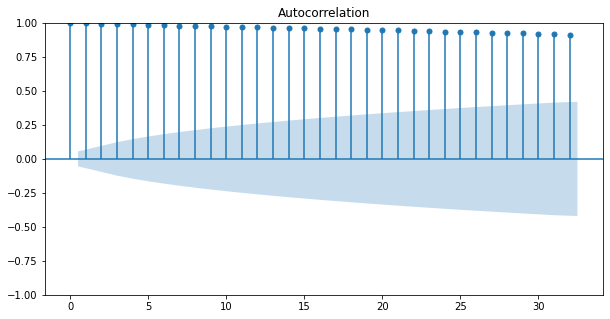

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf

plt.rc("figure", figsize=(10,5))
plot_acf(dataset['Adj Close'])
print()

## 📗 5.2 Partial Autocorrelation Function (PACF)

* The partial autocorrelation at lag k is the autocorrelation between X_t_t and X_(t-k) that is not accounted for by lags 1 through 𝑘−1. 
* PACF is a partial auto-correlation function. 
* Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 
* So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. 
* Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. 
* Hence we need to retain only the relevant features.
    
**The PACF plot can provide answers to the following question:**

* Can the observed time series be modeled with an AR model? If yes, what is the order?

## 📗 5.3 Commonality in PCF and PACF

* Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.
* The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.
* Additionally, you can see a blue area in the ACF and PACF plots.
* This blue area depicts the 95% confidence interval and is an indicator of the significance threshold.
* That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



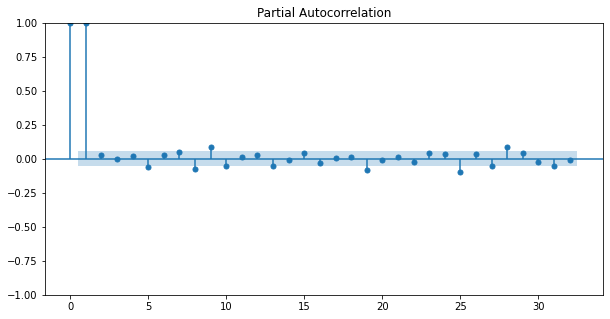

In [14]:
plt.rc("figure", figsize=(10,5))
plot_pacf(dataset['Adj Close'])
print()

## 🗨️ Take-away from PACF 

    Here upto Lag-value 2, we have strong correlation. So we can keep lag value 2 for our further experiments. 

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📒 Univariate - Time series forecasting </div>

## 🐈 Univariate Time Series Forecasting 

    🔵 Using ANN (Artificial Neural Network)
    🔵 Using RNNs (Recurrent Neural Network)
    🔵 Using LSTMs (Long Short Memory Network)
    🔵 Using CNNs (Convolution Neural Network)
    🔵 Using Encoder-Decoder Model
    🔵 Using Encoder-Decoder with Attention Mechanism

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📒 ANN - Artificial Neural Network </div>

## Overview of ANN - 
Artificial Neural Networks (ANN) are multi-layer fully-connected neural nets that look like the figure below. They consist of an input layer, multiple hidden layers, and an output layer. Every node in one layer is connected to every other node in the next layer. We make the network deeper by increasing the number of hidden layers.

![](https://miro.medium.com/max/720/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png)

    If we zoom in to one of the hidden or output nodes, what we will encounter is the figure below.
    
![](https://miro.medium.com/max/720/1*FcEfcrucAFymCr0gMFQ0QA@2x.png)   

A given node takes the weighted sum of its inputs, and passes it through a non-linear activation function. This is the output of the node, which then becomes the input of another node in the next layer. The signal flows from left to right, and the final output is calculated by performing this procedure for all the nodes. Training this deep neural network means learning the weights associated with all the edges.

The equation for a given node looks as follows. The weighted sum of its inputs passed through a non-linear activation function. It can be represented as a vector dot product, where n is the number of inputs for the node.

![](https://miro.medium.com/max/720/1*XBGeSr4IkHql0ZG_QnQu-Q@2x.png)

Backpropagation with gradient descent is literally the “magic” behind the deep learning models. It’s a rather long topic and involves some calculus, so we won’t go into the specifics in this applied deep learning series. 

**Common activation functions**

An activation function determines whether a neuron should be activated. The nonlinear functions typically convert the output of a given neuron to a value between 0 and 1 or -1 and 1. Some of the most commonly used functions are defined as follows:

**Sigmoid**: This is represented with the formula g(x) = 1/(1 + e^-x).

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13H-RecurrentNeuralNetworks-WHITEBG.png)

**Tanh**: This is represented with the formula g(x) = (e^-x - e^-x)/(e^-x + e^-x).

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13I-RecurrentNeuralNetworks-WHITEBG.png)

**Relu**: This is represented with the formula g(x) = max(0 , x)

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13J-RecurrentNeuralNetworks-WHITEBG.png)

# 📒 5. Artificial Neural Network - Univariate Stock Price Forecasting 

    Using Adjusted close price, we'll forecast the stock price for the next day. 

## 📗 5.1 Load Data - "Adj Close" price

In [15]:
data = dataset['Adj Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (1259,)


## 📗 5.2 Separate Train and Test data

In [16]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  1007
Shape of Train and Test data:  (1007,) (252,)


## 📗 5.3 Change Shape - Need 2D data

In [17]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (1007, 1) (252, 1)


## 📗 5.4 Split a Univariate sequence to Supervised Learning

In [18]:
# split a univariate sequence into supervised learning [Input and Output]
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

## 📗 5.5 Automatically select Lag value from PACF graph

*     It seems Lag should be 2

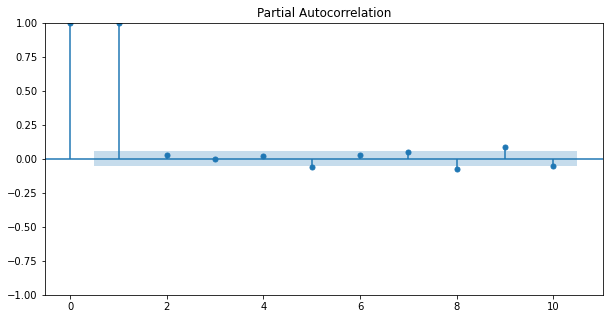

In [19]:
plot_pacf(data, lags=10)
plt.show()

## 📗 5.6 Taking Auto-correlation Lag value Greater than 10%

In [20]:
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


## 📗 5.7 Separate Input and Output

In [21]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [22]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (1004, 2) (1004,)
Shape of test_X and test_y:  (249, 2) (249,)


## 📗 5.8 How Data Looks Like - Input and Output

In [23]:
print(train_data[:20])            # original data
for x in range(len(train_X[:20])):
    print(test_X[x], test_y[x], )            # trainX and trainY after lookback

[[25.666668]
 [25.006666]
 [24.927334]
 [24.431999]
 [23.406   ]
 [22.999332]
 [23.016666]
 [22.731333]
 [22.639999]
 [22.74    ]
 [22.768667]
 [23.209333]
 [23.667334]
 [23.688667]
 [23.792   ]
 [22.862667]
 [23.705999]
 [23.639999]
 [23.712   ]
 [23.704666]]
[253.16333  243.389999] 246.460007
[243.389999 246.460007] 250.646667
[246.460007 250.646667] 251.213333
[250.646667 251.213333] 258.130005
[251.213333 258.130005] 263.786682
[258.130005 263.786682] 259.186676
[263.786682 259.186676] 260.436676
[259.186676 260.436676] 258.493347
[260.436676 258.493347] 258.406677
[258.493347 258.406677] 260.51001
[258.406677 260.51001 ] 260.196655
[260.51001  260.196655] 260.916656
[260.196655 260.916656] 264.536682
[260.916656 264.536682] 261.829987
[264.536682 261.829987] 263.980011
[261.829987 263.980011] 268.573334
[263.980011 268.573334] 270.359985
[268.573334 270.359985] 272.773346
[270.359985 272.773346] 281.01001
[272.773346 281.01001 ] 290.036682


## 📗 5.9 Build an MLP model

* **Sequential()** - The sequential API allows you to create models layer-by-layer
    
* **add()** - To create a Sequential model incrementally via the add() method
    
* **Dense()** - To add a stack of fully connected layer (either a hidden layer or an output layer)
    
* **input_dim** - To specify the input shape
    
* **Activation** - Decides the output a node. The purpose of the activation function is to introduce non-linearity   into the output of a neuron. 

* **Loss function** - The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function. 
        
* **Optimizer** - Minimizing the loss function, by changing the parameters (weights and biases)

In [24]:
# Fix random seed for reproducibility
# Thes seed value helps in initilizing random weights and biases to the neural network.  
np.random.seed(7)

In [25]:
# ML libraries
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras

In [26]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation='linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_hidden (Dense)           (None, 64)                192       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


## 📗 5.10 Fit data to Model

In [27]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle=False, 
                    validation_split=0.1)

Epoch 1/100
15/15 [==============================] - 3s 12ms/step - loss: 3201.1072 - val_loss: 15276.3672
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1912.4229 - val_loss: 9078.3848
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1073.8807 - val_loss: 4954.8818
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 551.3929 - val_loss: 2432.9502
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 252.9939 - val_loss: 1034.6281
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 105.4226 - val_loss: 374.3492
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 44.6570 - val_loss: 120.2504
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 24.5862 - val_loss: 44.8424
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 19.5036 - val_loss: 29.2883
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - 

## 📗 5.11 Train and Validation Loss

    We could have stopped in 20 - 30 epochs

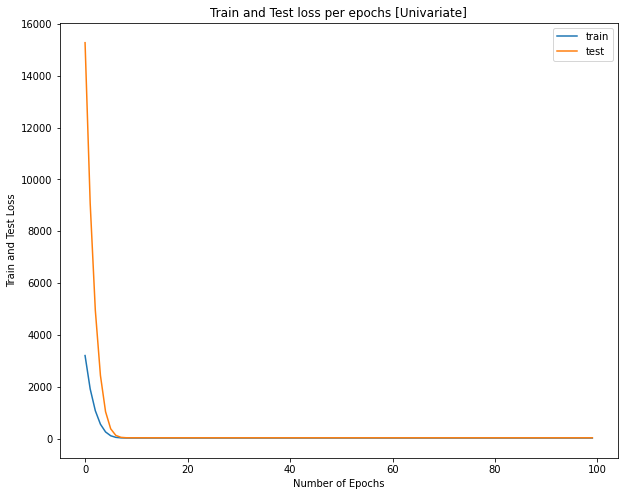

In [28]:
# plot history
plt.clf
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()



## 📗 5.12 Make Prediction

In [29]:
# Make prediction
testPredict = model.predict(test_X)

In [30]:
testPredict[:10]

array([[246.26437],
       [245.8102 ],
       [249.68839],
       [251.24757],
       [256.4189 ],
       [262.41815],
       [260.6337 ],
       [260.27856],
       [259.2121 ],
       [258.61624]], dtype=float32)

## 📗 5.13 Model evaluation - calculate RMSE

In [31]:
# calculate root mean squared error
# RMSE between actual and predicted cpu values
import math
from sklearn.metrics import mean_squared_error

testScore = math.sqrt(mean_squared_error(test_y[:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Test Score: 12.64 RMSE


## 📗 Plot Actual Test data and Predicted Data

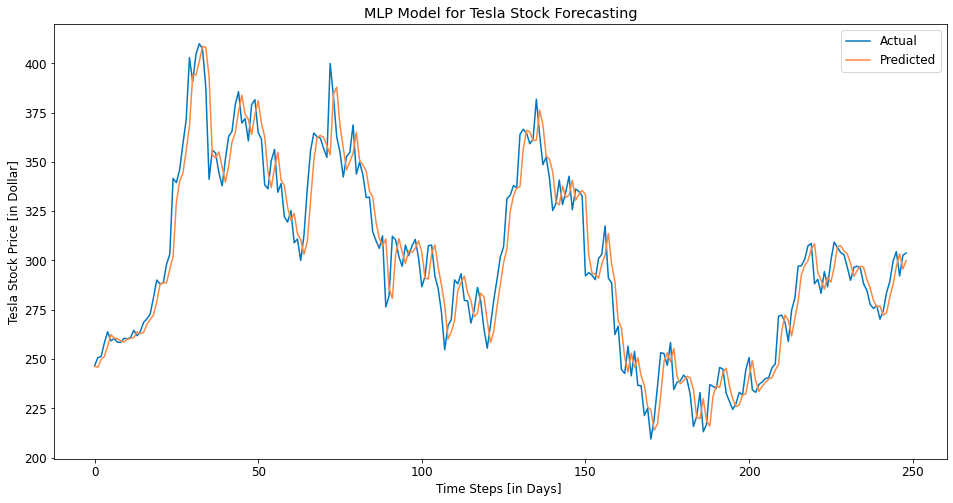

In [32]:
# Here we're plotting Test and Predicted data

plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be',label = 'Actual')
plt.plot(testPredict[:,0], '#ff8841',label = 'Predicted')
plt.title('MLP Model for Tesla Stock Forecasting')
plt.ylabel('Tesla Stock Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:center;display:fill;border-radius:5px;background-color:#d470a2;overflow:hidden;font-weight:700;border: 5px solid #5c74f5;"> 📒 RNN - Recurrent Neural Network </div>

A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning; they are incorporated into popular applications such as Siri, voice search, and Google Translate.

Like feedforward and convolutional neural networks (CNNs), recurrent neural networks utilize training data to learn. They are distinguished by their “memory” as they take information from prior inputs to influence the current input and output. While traditional deep neural networks assume that inputs and outputs are independent of each other, the output of recurrent neural networks depend on the prior elements within the sequence. 

**Recurrent Neural Network vs. Feedforward Neural Network**

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13A-RecurrentNeuralNetworks-WHITEBG.png)

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13B-RecurrentNeuralNetworks-WHITEBG.png)

**Backpropagation through time (BPTT)**

Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. 

These calculations allow us to adjust and fit the parameters of the model appropriately. BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.

**Vanishing gradients and Exploding gradients Problems**

RNNs tend to run into two problems, known as exploding gradients and vanishing gradients. These issues are defined by the size of the gradient, which is the slope of the loss function along the error curve. 

When the gradient is too small, it continues to become smaller, updating the weight parameters until they become insignificant—i.e. 0. When that occurs, the algorithm is no longer learning. 

Exploding gradients occur when the gradient is too large, creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as NaN. One solution to these issues is to reduce the number of hidden layers within the neural network, eliminating some of the complexity in the RNN model.

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-rnn-ltr.png?9ea4417fc145b9346a3e288801dbdfdc)

# 📒 6. RNN - Univariate Time Series Forecasting

## 📗 6.1 Load Data - "Adj Close" price

In [33]:
data = dataset['Adj Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (1259,)


## 📗 6.2 Train - Test Split

In [34]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  1007
Shape of Train and Test data:  1007 252


## 📗 6.3 Make time-series data supervised

In [35]:
# split a univariate sequence into supervised learning [Input and Output]
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## 📗 6.4 Lag Value already Choosen from PACF Plot

In [36]:
lag = 2  # Empirically we have choosen
n_features = 1

In [37]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [38]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (1005, 2) (1005,)
Shape of test_X and test_y:  (250, 2) (250,)


## 📗 6.5 Reshape train_X and test_X to 3-Dimension

In [39]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [40]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (1005, 2, 1) (1005,)
Shape of test_X and test_y:  (250, 2, 1) (250,)


## 📗 6.6 Building and Defining the model

In [41]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense

In [42]:
# define model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(lag, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 64)                4224      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


## 📗 6.7 Fit the model - with training data

In [43]:
# As you are trying to use function decorator in TF 2.0, 
# please enable run function eagerly by using below line after importing TensorFlow:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [44]:
# fit model

history = model.fit(train_X, train_y, epochs = 50, batch_size=64, verbose=1, validation_split= 0.1)

Epoch 1/50
 5/15 [=========>....................] - ETA: 0s - loss: 8850.0908

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



15/15 [==============================] - 0s 18ms/step - loss: 6290.3833 - val_loss: 18744.2051
Epoch 2/50
15/15 [==============================] - 0s 16ms/step - loss: 2008.4310 - val_loss: 3688.3335
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 261.2628 - val_loss: 35.4032
Epoch 4/50
15/15 [==============================] - 0s 16ms/step - loss: 41.3537 - val_loss: 212.7447
Epoch 5/50
15/15 [==============================] - 0s 15ms/step - loss: 36.3259 - val_loss: 49.4790
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 22.4607 - val_loss: 36.5823
Epoch 7/50
15/15 [==============================] - 0s 15ms/step - loss: 23.3526 - val_loss: 35.7864
Epoch 8/50
15/15 [==============================] - 0s 15ms/step - loss: 22.8356 - val_loss: 36.7846
Epoch 9/50
15/15 [==============================] - 0s 15ms/step - loss: 22.3053 - val_loss: 34.5948
Epoch 10/50
15/15 [==============================] - 0s 15ms/step - loss: 22.3076 - val_los

## 📗 6.8 Summarize model accuracy and Loss

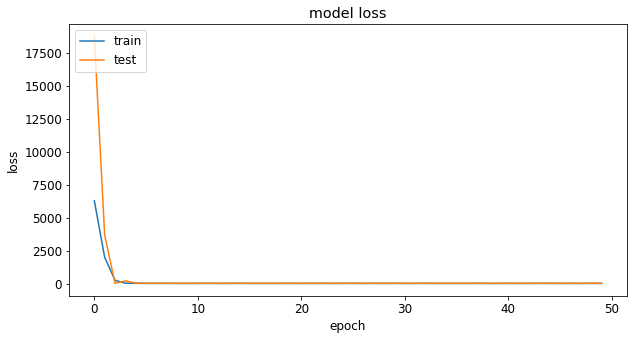

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 📗 6.9 Make prediction - with Test data

In [46]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

Shape of train and test predict:  (1005, 1) (250, 1)


## 📗 6.10 Model evaluation

In [47]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(train_y, train_predict)
test_score = measure_rmse(test_y, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  4.84563552528769 14.333363555787052


## 6.11 Plot test data and Predicted data


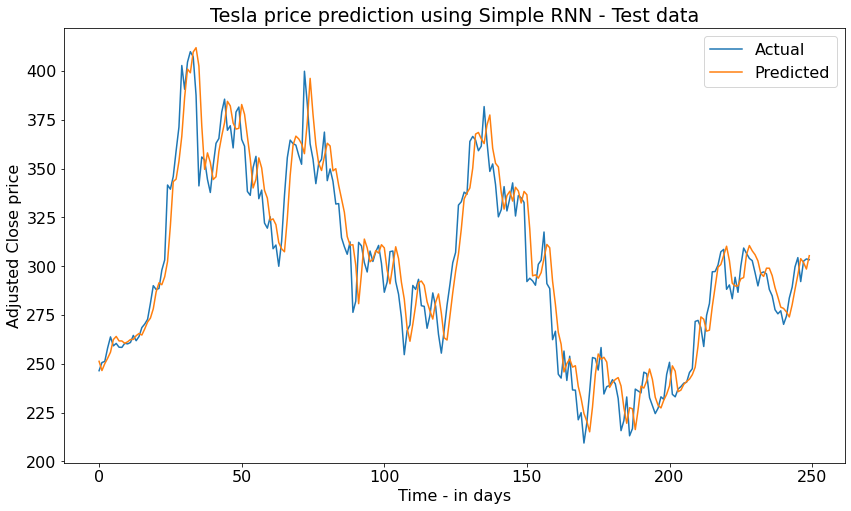

In [48]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(test_y, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.xlabel('Time - in days')
plt.ylabel('Adjusted Close price')
plt.title('Tesla price prediction using Simple RNN - Test data')
plt.legend()
plt.show()

![](https://t4.ftcdn.net/jpg/02/72/82/95/360_F_272829541_A26tYfmciFsnWL1BoBjys19L5ycZrlOr.jpg)

## To be continued ...


## References

[1. Adjusted Closing price - Investopedia](https://www.investopedia.com/ask/answers/06/adjustedclosingprice.asp)

[2. Overview of ANN](https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6)

[3. ANN for Machine Learning](https://data-flair.training/blogs/artificial-neural-networks-for-machine-learning/)

[4. Recurrent Neural Network](https://www.ibm.com/cloud/learn/recurrent-neural-networks)

[5. Stanford Cheat Sheet on RNN](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)

[6. Deep Learning Tutorial](https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn)